In [1]:
!pip install ultralytics --q

In [2]:
from ultralytics import YOLO

In [3]:
model = YOLO("yolo11n.pt")

In [4]:
train_results = model.train(
    data="/kaggle/input/nttttt/data.yaml",
    epochs=20,
    imgsz=640,
    conf=0.5,
)

Ultralytics 8.3.201 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=0.5, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/nttttt/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train3, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all         99         99      0.861      0.939      0.922      0.622
Speed: 0.2ms preprocess, 4.5ms inference, 0.0ms loss, 2.5ms postprocess per image
Results saved to /kaggle/working/runs/detect/train3


In [13]:
model = YOLO("/kaggle/working/runs/detect/train3/weights/best.pt")


image 1/1 /kaggle/input/nttttt/test/images/187_png.rf.584d96a1b799bcbb708f468a3c1f05df.jpg: 640x640 1 NT, 11.6ms
Speed: 2.0ms preprocess, 11.6ms inference, 1.7ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/runs/detect/predict4


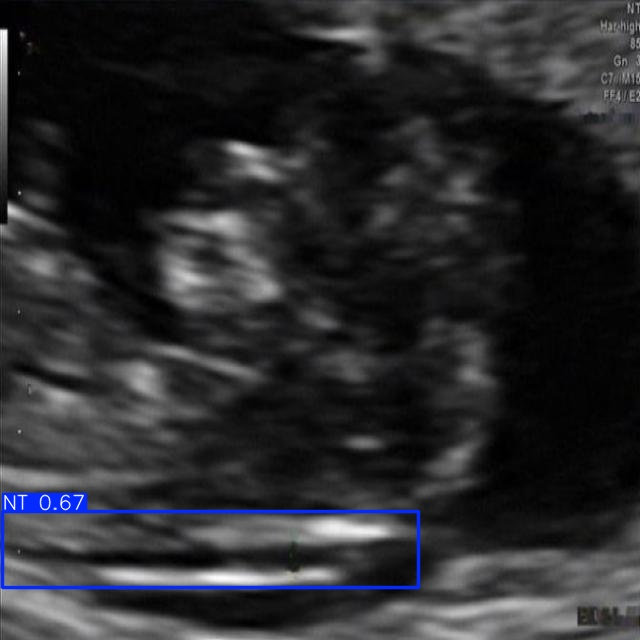

In [30]:
from IPython.display import Image, display
import os
results = model(source = "/kaggle/input/nttttt/test/images/187_png.rf.584d96a1b799bcbb708f468a3c1f05df.jpg",conf=0.5, save=True)

# Get the path of the saved image
saved_dir = results[0].save_dir       # directory where image was saved
image_name = os.path.basename(results[0].path)  # just the file name
saved_path = os.path.join(saved_dir, image_name)  # full path

# Display in notebook
display(Image(filename=saved_path))

In [31]:
results = model("/kaggle/input/nttttt/test/images/187_png.rf.584d96a1b799bcbb708f468a3c1f05df.jpg", save=True)

for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    print(boxes)


image 1/1 /kaggle/input/nttttt/test/images/187_png.rf.584d96a1b799bcbb708f468a3c1f05df.jpg: 640x640 1 NT, 11.3ms
Speed: 2.1ms preprocess, 11.3ms inference, 1.4ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/runs/detect/predict4
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.], device='cuda:0')
conf: tensor([0.6729], device='cuda:0')
data: tensor([[  2.5367, 511.0627, 418.6519, 587.7184,   0.6729,   0.0000]], device='cuda:0')
id: None
is_track: False
orig_shape: (640, 640)
shape: torch.Size([1, 6])
xywh: tensor([[210.5943, 549.3905, 416.1152,  76.6557]], device='cuda:0')
xywhn: tensor([[0.3291, 0.8584, 0.6502, 0.1198]], device='cuda:0')
xyxy: tensor([[  2.5367, 511.0627, 418.6519, 587.7184]], device='cuda:0')
xyxyn: tensor([[0.0040, 0.7985, 0.6541, 0.9183]], device='cuda:0')


In [36]:
from ultralytics import SAM

# Load the YOLO model
yolo_model = YOLO("/kaggle/working/runs/detect/train3/weights/best.pt")  # pretrained YOLO model

# Run batched inference on a list of images
results = yolo_model("/kaggle/input/nttttt/test/images/187_png.rf.584d96a1b799bcbb708f468a3c1f05df.jpg", conf =0.5)  # return a list of Results objects

# Load the SAM model
sam_model = SAM("sam2_b.pt")

for result in results: 
     class_ids = result.boxes.cls.int().tolist()  # noqa 
     if len(class_ids): 
         boxes = result.boxes.xyxy  # Boxes object for bbox outputs 
         sam_results = sam_model(result.orig_img, bboxes=boxes, verbose=False, save=True, device='cpu')
         


image 1/1 /kaggle/input/nttttt/test/images/187_png.rf.584d96a1b799bcbb708f468a3c1f05df.jpg: 640x640 1 NT, 11.7ms
Speed: 1.9ms preprocess, 11.7ms inference, 1.6ms postprocess per image at shape (1, 3, 640, 640)
Results saved to /kaggle/working/runs/segment/predict8


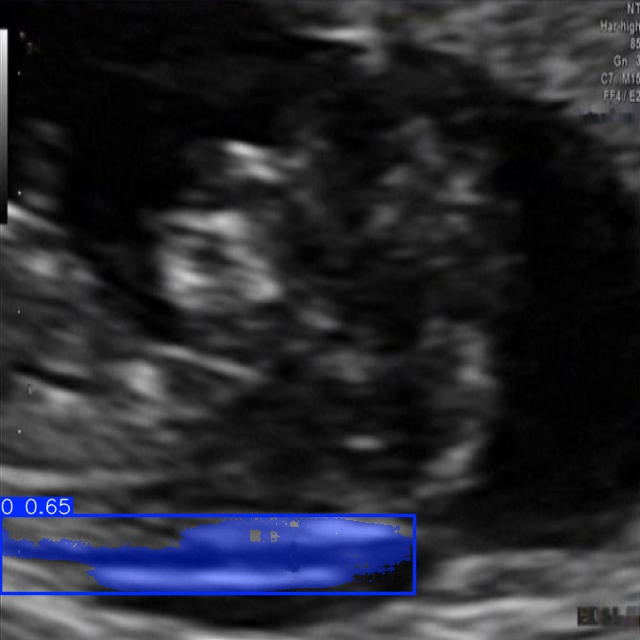

In [38]:
display(Image('/kaggle/working/runs/segment/predict8/image0.jpg'))